In [1]:
!pip install pyclustering
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=edf73e72c44f2494ba97ae367b77a8d8c124db04a82b5b8b1bab535c134f82f7
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


## Kaggle: Creditcard
- source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- github repository:


About Dataset

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Acknowledgements from Kaggle

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project



## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Dataset Selection

In [6]:
# Load dataset
df2 = pd.read_csv('/content/creditcard.csv')

# Handle missing values
df2.dropna(inplace=True)

# Standardize numerical features
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2.select_dtypes(include=[np.number]))

## Dimensionality Reduction

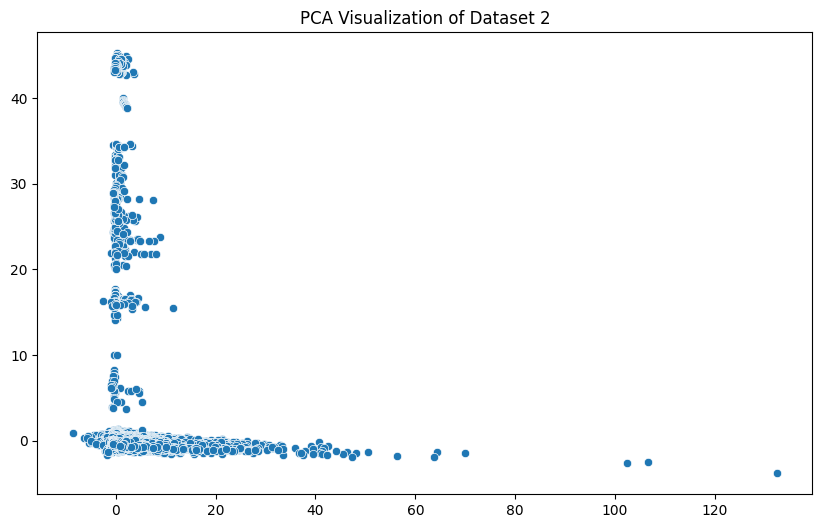

In [7]:
#Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df2_pca = pca.fit_transform(df2_scaled)

# Visualize Dataset_2 PCA Results
plt.figure(figsize=(10,6))
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1])
plt.title("PCA Visualization of Dataset 2")
plt.show()

## Clustering Implementation

# Bayesian Clustering Implementation

In [8]:
from sklearn.mixture import BayesianGaussianMixture

def bayesian_gaussian_mixture(data, max_components=10):
    bgmm = BayesianGaussianMixture(
        n_components=max_components,
        covariance_type='full',
        weight_concentration_prior=1e-2,
        weight_concentration_prior_type='dirichlet_process'
    )
    clusters = bgmm.fit_predict(data)
    return clusters, bgmm

In [11]:
# Run Bayesian Clustering
clusters_bayesian, bgmm_model = bayesian_gaussian_mixture(df2_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


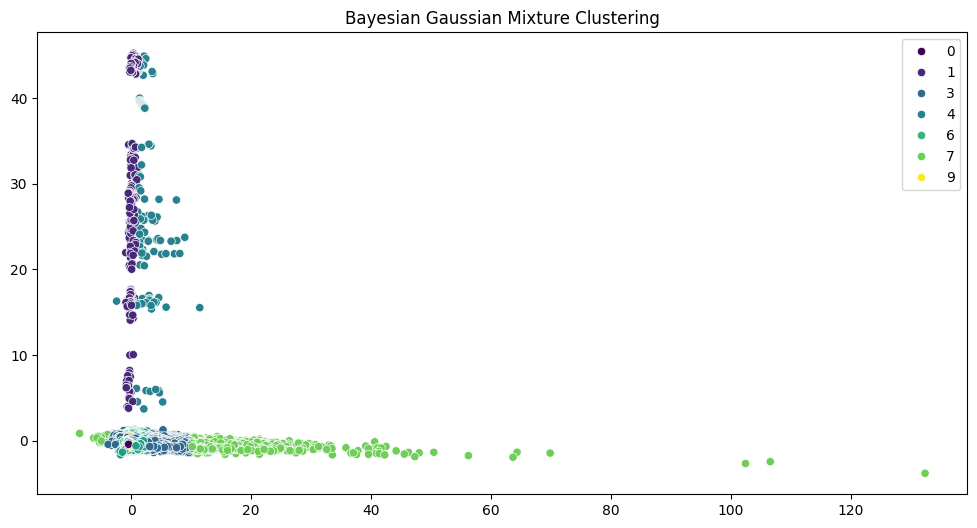

In [14]:
# Clustering Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df2_pca[:, 0], y=df2_pca[:, 1], hue=clusters_bayesian.astype(int), palette='viridis')
plt.title("Bayesian Gaussian Mixture Clustering")
plt.show()

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Cluster Validation
silhouette_score_bayesian = silhouette_score(df2_pca, clusters_bayesian)
davies_bouldin_score_bayesian = davies_bouldin_score(df2_pca, clusters_bayesian)
calinski_harabasz_score_bayesian = calinski_harabasz_score(df2_pca, clusters_bayesian)

# Print Validation Metrics
print("Bayesian Clustering Validation Metrics:")
print("Silhouette Score:", silhouette_score_bayesian)
print("Davies-Bouldin Score:", davies_bouldin_score_bayesian)
print("Calinski-Harabasz Score:", calinski_harabasz_score_bayesian)

Bayesian Clustering Validation Metrics:
Silhouette Score: 0.23559780194160343
Davies-Bouldin Score: 2.3553870030309945
Calinski-Harabasz Score: 124055.54691206306
